In [ ]:
from google.colab import files
files.upload()

Saving submission_format.csv to submission_format.csv


{'submission_format.csv': b'respondent_id,h1n1_vaccine,seasonal_vaccine\n26707,0.5,0.7\n26708,0.5,0.7\n26709,0.5,0.7\n26710,0.5,0.7\n26711,0.5,0.7\n26712,0.5,0.7\n26713,0.5,0.7\n26714,0.5,0.7\n26715,0.5,0.7\n26716,0.5,0.7\n26717,0.5,0.7\n26718,0.5,0.7\n26719,0.5,0.7\n26720,0.5,0.7\n26721,0.5,0.7\n26722,0.5,0.7\n26723,0.5,0.7\n26724,0.5,0.7\n26725,0.5,0.7\n26726,0.5,0.7\n26727,0.5,0.7\n26728,0.5,0.7\n26729,0.5,0.7\n26730,0.5,0.7\n26731,0.5,0.7\n26732,0.5,0.7\n26733,0.5,0.7\n26734,0.5,0.7\n26735,0.5,0.7\n26736,0.5,0.7\n26737,0.5,0.7\n26738,0.5,0.7\n26739,0.5,0.7\n26740,0.5,0.7\n26741,0.5,0.7\n26742,0.5,0.7\n26743,0.5,0.7\n26744,0.5,0.7\n26745,0.5,0.7\n26746,0.5,0.7\n26747,0.5,0.7\n26748,0.5,0.7\n26749,0.5,0.7\n26750,0.5,0.7\n26751,0.5,0.7\n26752,0.5,0.7\n26753,0.5,0.7\n26754,0.5,0.7\n26755,0.5,0.7\n26756,0.5,0.7\n26757,0.5,0.7\n26758,0.5,0.7\n26759,0.5,0.7\n26760,0.5,0.7\n26761,0.5,0.7\n26762,0.5,0.7\n26763,0.5,0.7\n26764,0.5,0.7\n26765,0.5,0.7\n26766,0.5,0.7\n26767,0.5,0.7\n26768,0.5,0.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


In [ ]:
#read from csv
training_x = pd.read_csv('training_set_features.csv')
training_y = pd.read_csv('training_set_labels.csv')
test_x = pd.read_csv('test_set_features.csv')
#remove id col
training_x = training_x.iloc[:,1:]
test_x = test_x.iloc[:,1:]

# Preprocessing

In [ ]:
num_vars = training_x.select_dtypes('float64').columns
cat_vars = training_x.select_dtypes(exclude='float64').columns

#remove if missing categorical data ---> removes half the data ---> therefore didn't used
#training_x = training_x.dropna(subset=cat_vars)




In [ ]:
#checking null percentages in categorical training data
total = training_x[cat_vars].isnull().sum().sort_values(ascending=False)
percent = (training_x[cat_vars].isnull().sum()/training_x[cat_vars].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
employment_occupation,13470,0.504362
employment_industry,13330,0.499120
income_poverty,4423,0.165612
rent_or_own,2042,0.076459
employment_status,1463,0.054780
marital_status,1408,0.052720
education,1407,0.052683
census_msa,0,0.000000
hhs_geo_region,0,0.000000
sex,0,0.000000


In [ ]:
#remove high perc null data
training_x.drop(columns=['employment_occupation', 'employment_industry'], inplace=True)
test_x.drop(columns=['employment_occupation', 'employment_industry'], inplace=True)


In [ ]:
#update cat_vars since we deleted some
cat_vars = training_x.select_dtypes(exclude='float64').columns

In [ ]:
#replace the low perc null value with most common
for col in cat_vars:
  if col!='employment_occupation' and col!='employment_industry':
    training_x[col] = training_x[col].fillna(training_x[col].value_counts().index[0])
    test_x[col] = test_x[col].fillna(test_x[col].value_counts().index[0])

In [ ]:
#checking null percentages in categorical training data again
total = training_x[cat_vars].isnull().sum().sort_values(ascending=False)
percent = (training_x[cat_vars].isnull().sum()/training_x[cat_vars].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
employment_occupation,13470,0.504362
employment_industry,13330,0.499120
census_msa,0,0.000000
hhs_geo_region,0,0.000000
employment_status,0,0.000000
rent_or_own,0,0.000000
marital_status,0,0.000000
income_poverty,0,0.000000
sex,0,0.000000
race,0,0.000000


In [ ]:
#let's look at missing data in numeric values now
total = training_x[num_vars].isnull().sum().sort_values(ascending=False)
percent = (training_x[num_vars].isnull().sum()/training_x[num_vars].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
health_insurance,12274,0.459580
doctor_recc_seasonal,2160,0.080878
doctor_recc_h1n1,2160,0.080878
chronic_med_condition,971,0.036358
child_under_6_months,820,0.030704
health_worker,804,0.030104
opinion_seas_sick_from_vacc,537,0.020107
opinion_seas_risk,514,0.019246
opinion_seas_vacc_effective,462,0.017299
opinion_h1n1_sick_from_vacc,395,0.014790


In [ ]:
#health insurance has a lot of missing but sounds like an important feature
training_x.drop(columns=['health_insurance'], inplace=True)
test_x.drop(columns=['health_insurance'], inplace=True)

In [ ]:
#update num_vars since we deleted some
num_vars = training_x.select_dtypes('float64').columns

In [ ]:
#dealing with other null features
for col in num_vars:
  if col!='health_insurance':
    training_x[col] = training_x[col].interpolate(method='linear')
    test_x[col] = test_x[col].interpolate(method='linear')

In [ ]:
#we should have no null rows left
total = training_x.isnull().sum().sort_values(ascending=False)
percent = (training_x.isnull().sum()/training_x.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
employment_occupation,13470,0.504362
employment_industry,13330,0.499120
health_insurance,12274,0.459580
h1n1_knowledge,0,0.000000
behavioral_antiviral_meds,0,0.000000
behavioral_avoidance,0,0.000000
behavioral_face_mask,0,0.000000
behavioral_wash_hands,0,0.000000
behavioral_large_gatherings,0,0.000000
behavioral_outside_home,0,0.000000


In [ ]:
#create dummy variables for categorical data
training_x = pd.get_dummies(training_x)
test_x = pd.get_dummies(test_x)


In [ ]:
#checking our new shape
print(training_x.shape, " ", test_x.shape)

(26707, 105)   (26708, 105)


In [ ]:
#checking if our new labels match
missing_cols = set( training_x.columns ) - set( test_x.columns )
missing_cols


set()

In [ ]:
#adding new features
for col in num_vars:
  training_x[col+"^2"] = training_x[col] ** 2
  test_x[col+"^2"] = training_x[col] ** 2

In [ ]:
#checking how our labels range 
training_x.max() - training_x.min()

h1n1_concern                      3.0
h1n1_knowledge                    2.0
behavioral_antiviral_meds         1.0
behavioral_avoidance              1.0
behavioral_face_mask              1.0
                                 ... 
opinion_seas_vacc_effective^2    24.0
opinion_seas_risk^2              24.0
opinion_seas_sick_from_vacc^2    24.0
household_adults^2                9.0
household_children^2              9.0
Length: 128, dtype: float64

In [ ]:
#split the data before normalizing to prevent data leak
from sklearn.model_selection import train_test_split
perc=0.2
X_train, X_test, y_train, y_test = train_test_split(training_x, training_y, test_size=perc)

In [ ]:
#apply minMax scaling to our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns= X_test.columns)
test_x = pd.DataFrame(scaler.fit_transform(test_x), columns= test_x.columns)

In [ ]:
#apply robust scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns= X_test.columns)
test_x = pd.DataFrame(scaler.fit_transform(test_x), columns= test_x.columns)

In [ ]:
#checking labels range again
X_train.max() - X_train.min()

h1n1_concern                     3.000000
h1n1_knowledge                   2.000000
behavioral_antiviral_meds        1.000000
behavioral_avoidance             1.000000
behavioral_face_mask             1.000000
                                   ...   
opinion_seas_vacc_effective^2    2.666667
opinion_seas_risk^2              2.000000
opinion_seas_sick_from_vacc^2    3.000000
household_adults^2               9.000000
household_children^2             9.000000
Length: 128, dtype: float64

# Analyzing Our Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


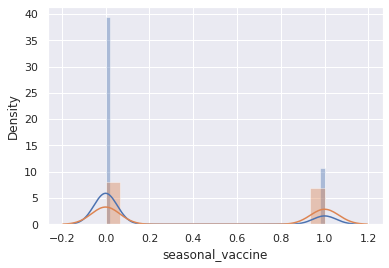

In [ ]:
#how our targets 
sns.distplot(training_y['h1n1_vaccine'])
sns.distplot(training_y['seasonal_vaccine'])

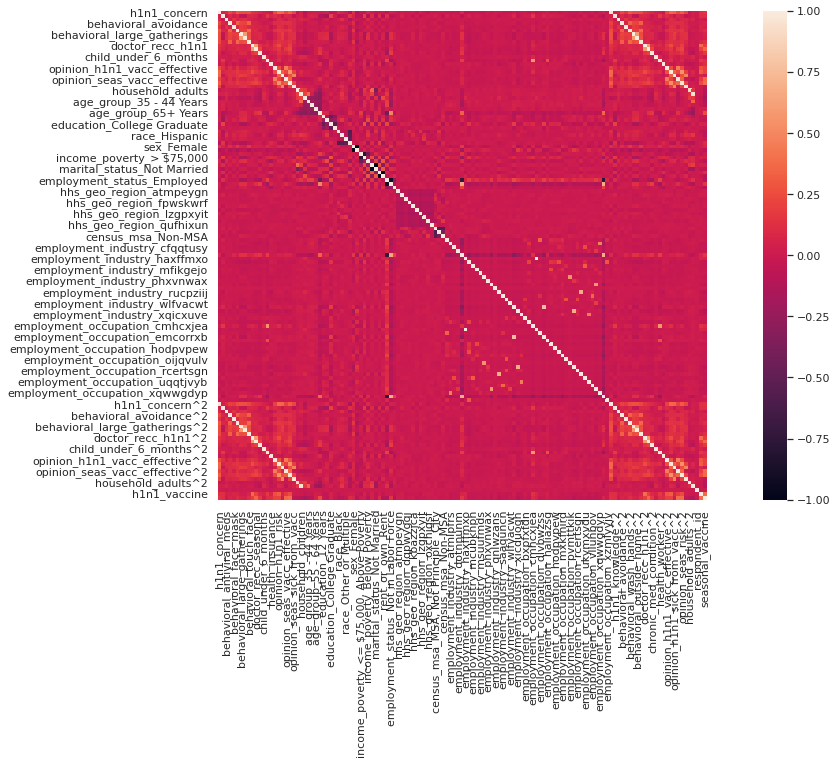

In [ ]:
#how our features and targets correlate with each other
corrmat = training_x.join(training_y).corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=1, square=True);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

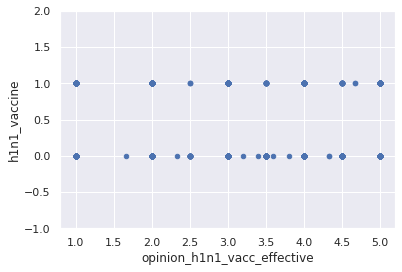

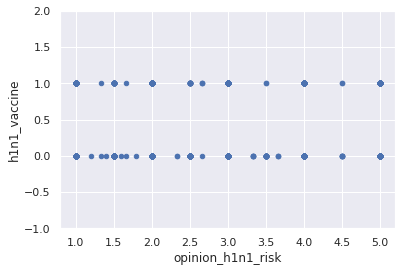

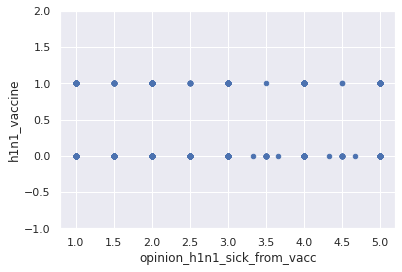

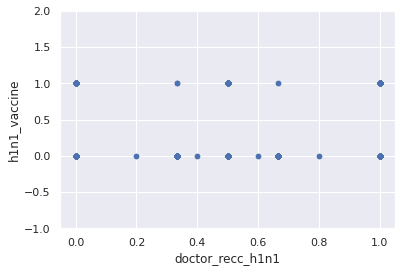

In [ ]:
#examining some labels that have high corelation with h1n1_vaccine
vars = ['opinion_h1n1_vacc_effective','opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc','doctor_recc_h1n1']
for var in vars:
  data = pd.concat([training_y['h1n1_vaccine'], training_x[var]], axis=1)
  data.plot.scatter(x=var, y='h1n1_vaccine', ylim=(-1,2));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

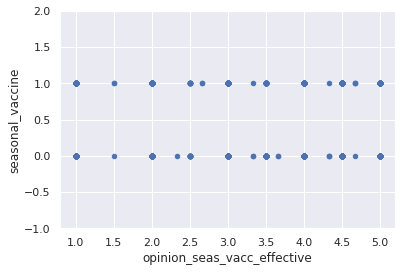

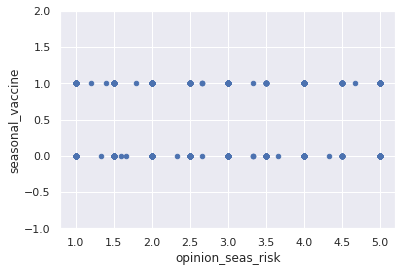

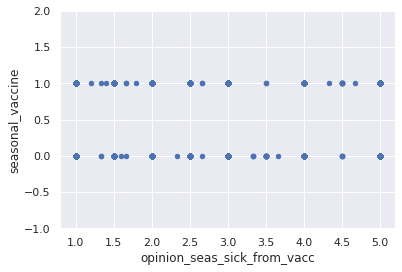

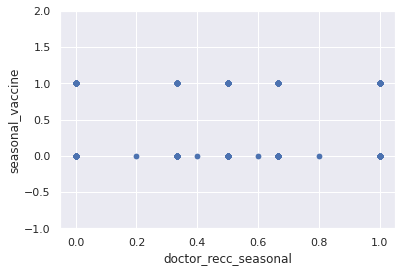

In [ ]:
#examining some labels that have high corelation with h1n1_seasonal
vars = ['opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc','doctor_recc_seasonal']
for var in vars:
  data = pd.concat([training_y['seasonal_vaccine'], training_x[var]], axis=1)
  data.plot.scatter(x=var, y='seasonal_vaccine', ylim=(-1,2));

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


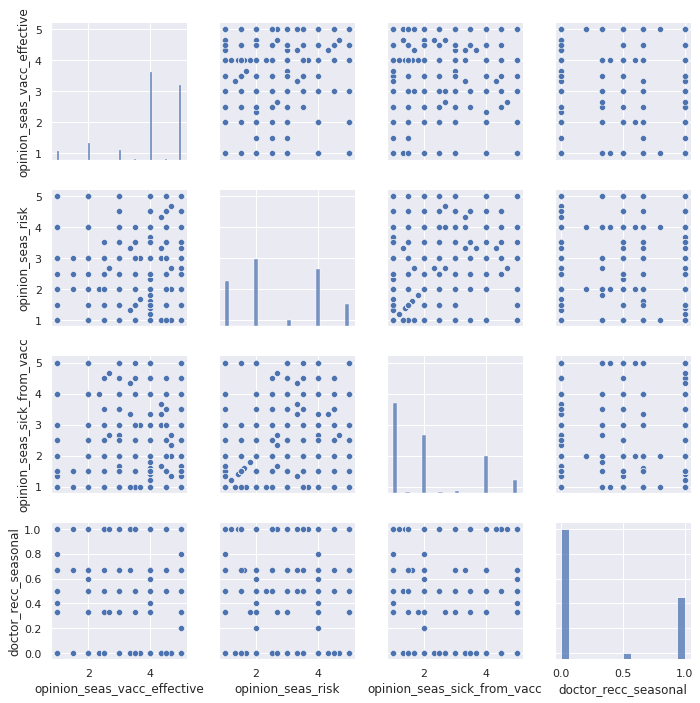

In [ ]:
#scatterplot
sns.set()
cols = ['opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc','doctor_recc_seasonal']
sns.pairplot(training_x[cols], size = 2.5)
plt.show();

# Training

In [ ]:
#fix for the features name may not contain [] < problem
import re
for data in [X_train, X_test, test_x]:
  regex = re.compile(r"\[|\]|<", re.IGNORECASE)
  data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in data.columns.values]
  data.columns = [c.replace(' ', '_') for c in data.columns]

In [ ]:
from xgboost import XGBClassifier

model_h1n1 = XGBClassifier(
    max_depth=1,
    n_estimators=100000,
    subsample=1,
    colsample_bytree=0.05,
    learning_rate=0.1,
    reg_alpha=0.5,
    seed=42)

model_seasonal = XGBClassifier(
    max_depth=3,
    n_estimators=100000,
    colsample_bytree=0.05,
    subsample=0.9,
    learning_rate=0.1,
    reg_alpha=0.2,
    #min_child_weight=3,
    seed=42)


In [ ]:
model_h1n1.fit(
    X_train, 
    y_train['h1n1_vaccine'], 
    eval_metric="auc", 
    eval_set=[(X_train, y_train['h1n1_vaccine']), (X_test, y_test['h1n1_vaccine'])], 
    verbose=True, 
    early_stopping_rounds = 1000)



[0]	validation_0-auc:0.562046	validation_1-auc:0.581323
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 1000 rounds.
[1]	validation_0-auc:0.562046	validation_1-auc:0.581323
[2]	validation_0-auc:0.681119	validation_1-auc:0.684885
[3]	validation_0-auc:0.772001	validation_1-auc:0.765784
[4]	validation_0-auc:0.775211	validation_1-auc:0.767851
[5]	validation_0-auc:0.787982	validation_1-auc:0.779118
[6]	validation_0-auc:0.787556	validation_1-auc:0.779856
[7]	validation_0-auc:0.780282	validation_1-auc:0.772242
[8]	validation_0-auc:0.780714	validation_1-auc:0.772124
[9]	validation_0-auc:0.784964	validation_1-auc:0.775551
[10]	validation_0-auc:0.785129	validation_1-auc:0.77565
[11]	validation_0-auc:0.786867	validation_1-auc:0.776305
[12]	validation_0-auc:0.787635	validation_1-auc:0.775989
[13]	validation_0-auc:0.789456	validation_1-auc:0.778301
[14]	validation_0-auc:0.790189	validation_1-auc:0.7790

KeyboardInterrupt: ignored

In [ ]:
#join validation for histgradient
X_train = X_train.join(X_test)
y_train = y_train.join(y_test)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(l2_regularization=0.45, 
                                     max_depth=1,
                                     max_iter=1000,
                                     scoring='roc_auc',
                                     n_iter_no_change=100,
                                     validation_fraction=0.2,
                                     verbose=1)
clf.fit(X_train.values, y_train['h1n1_vaccine'])
clf2 = HistGradientBoostingClassifier(l2_regularization=0.45, 
                                      max_depth=2,
                                      max_iter=1000,
                                      scoring='roc_auc',
                                      n_iter_no_change=100,
                                      validation_fraction=0.2,
                                      verbose=1)
clf2.fit(X_train.values, y_train['seasonal_vaccine'])


Binning 0.018 GB of training data: 0.117 s
Binning 0.004 GB of validation data: 0.012 s
Fitting gradient boosted rounds:
[1/1000] 1 tree, 2 leaves, max depth = 1, train score: 0.69279, val score: 0.70419, in 0.019s
[2/1000] 1 tree, 2 leaves, max depth = 1, train score: 0.69279, val score: 0.70419, in 0.018s
[3/1000] 1 tree, 2 leaves, max depth = 1, train score: 0.69279, val score: 0.70419, in 0.019s
[4/1000] 1 tree, 2 leaves, max depth = 1, train score: 0.76110, val score: 0.77304, in 0.019s
[5/1000] 1 tree, 2 leaves, max depth = 1, train score: 0.79216, val score: 0.80196, in 0.019s
[6/1000] 1 tree, 2 leaves, max depth = 1, train score: 0.79216, val score: 0.80196, in 0.019s
[7/1000] 1 tree, 2 leaves, max depth = 1, train score: 0.81418, val score: 0.82644, in 0.020s
[8/1000] 1 tree, 2 leaves, max depth = 1, train score: 0.80874, val score: 0.82134, in 0.020s
[9/1000] 1 tree, 2 leaves, max depth = 1, train score: 0.81418, val score: 0.82644, in 0.025s
[10/1000] 1 tree, 2 leaves, max d

HistGradientBoostingClassifier(l2_regularization=0.45, max_depth=1,
                               max_iter=1000, n_iter_no_change=100,
                               scoring='roc_auc', validation_fraction=0.2,
                               verbose=1)

In [ ]:
preds_h1n1 = clf.predict_proba(test_x.values)[:,1:]
preds_seasonal = clf2.predict_proba(test_x.values)[:,1:]

In [ ]:
submission = pd.read_csv('submission_format.csv')
submission['h1n1_vaccine'] = preds_h1n1
submission['seasonal_vaccine'] = preds_seasonal

In [ ]:
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.078442,0.158603
1,26708,0.025411,0.026247
2,26709,0.139417,0.668513
3,26710,0.687259,0.749049
4,26711,0.315439,0.417090
...,...,...,...
26703,53410,0.270762,0.472725
26704,53411,0.173172,0.406460
26705,53412,0.174624,0.127184
26706,53413,0.027006,0.211588


In [ ]:
submission.to_csv('submission_someNullsLeft_hist_highReg', index=False)